In [2]:
import models as m
import dataset as d
import numpy as np
import logger as l

filename = './datasets/pinem_amp100_bkgd0.1_nort_seed42.npz'
test_filename = './datasets/test_model_pinem_amp100_bkgd0.1_nort_seed42.npz'
logger_path = './logs/cnn_3layers_32_v1.json'

# Load the dataset
_ = [1,2,3,4,5]
normalization = 'normalize'

dataset = d.DatasetPinem(*_,load = filename)

# xs : g rt fwhm omega offset

pipe = m.DataPreprocessor(dataset.noisy_spectres, dataset.xs[:,:-3],normalization=normalization, convolution=True)

log = l.ModelInfo(logger_path)
log.add_iteration(filename,test_filename)
log.save_norm(normalization)

(X_train, y_train), (X_val, y_val), (X_test, y_test) = pipe.preprocess()

# Create the model

cnn = m.CNNModel(1024,2, mode = 'normal',filters=[32,32,32],kernel_size=[3,3,3],dropouts=[0.5,0.5,0.5])

log.save_model(cnn)


In [3]:
cnn.train(X_train, y_train, X_val, y_val, epochs = 500, batch_size = 32)

Epoch 1/500


2024-03-08 15:51:13.504593: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-08 15:51:14.473126: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8ca7789560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-08 15:51:14.473141: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A3000 Laptop GPU, Compute Capability 8.6
2024-03-08 15:51:14.476700: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709909474.536743   22566 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1434/1434 [==============================] - 9s 5ms/step - loss: 0.1140 - mse: 0.1140 - mae: 0.2108 - val_loss: 0.1487 - val_mse: 0.1487 - val_mae: 0.2817
Epoch 2/500
1434/1434 [==============================] - 6s 4ms/step - loss: 0.0519 - mse: 0.0519 - mae: 0.1414 - val_loss: 0.1144 - val_mse: 0.1144 - val_mae: 0.2705
Epoch 3/500
1434/1434 [==============================] - 5s 4ms/step - loss: 0.0441 - mse: 0.0441 - mae: 0.1294 - val_loss: 0.1258 - val_mse: 0.1258 - val_mae: 0.2759
Epoch 4/500
1434/1434 [==============================] - 5s 4ms/step - loss: 0.0384 - mse: 0.0384 - mae: 0.1206 - val_loss: 0.1189 - val_mse: 0.1189 - val_mae: 0.2580
Epoch 5/500
1434/1434 [==============================] - 5s 4ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1114 - val_loss: 0.1291 - val_mse: 0.1291 - val_mae: 0.2765
Epoch 6/500
1434/1434 [==============================] - 5s 4ms/step - loss: 0.0299 - mse: 0.0299 - mae: 0.1067 - val_loss: 0.1177 - val_mse: 0.1177 - val_mae: 0.2568
Epoch 7/50

In [7]:
tst = np.load(test_filename)
test_pipe = m.DataPreprocessor(1,2)
X_test = test_pipe.normalize_data(tst['data'])
res = cnn.predict(X_test)

err = res - tst['truth']
mean_err = np.mean(err, axis = 0)
std_err = np.std(err, axis = 0)
err_dict= {'mean_g_err' : mean_err[0], 'std_g_err' : std_err[0], 'mean_rt_err' : mean_err[1], 'std_rt_err' : std_err[1]}

#log.save_test_results(err_dict)
#log.save()

79/79 [==============================] - 0s 1ms/step


In [8]:
log.save_test_results(err_dict)

In [9]:
log.save()

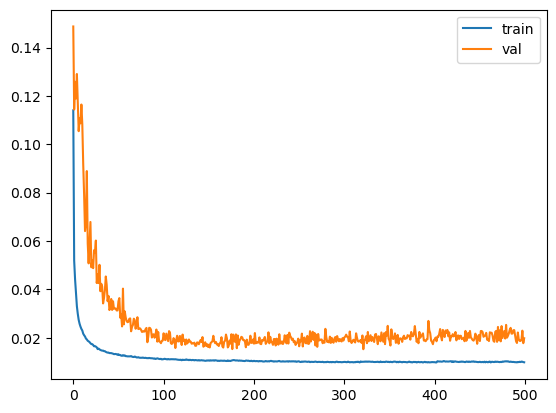

In [14]:
cnn.plot_history()

In [26]:
cnn.save_model('./models/cnn_3layers_32_v1.h5')

/home/adrien/anaconda3/envs/keras2/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# 400 epochs should suffice

(0.01, 0.04)

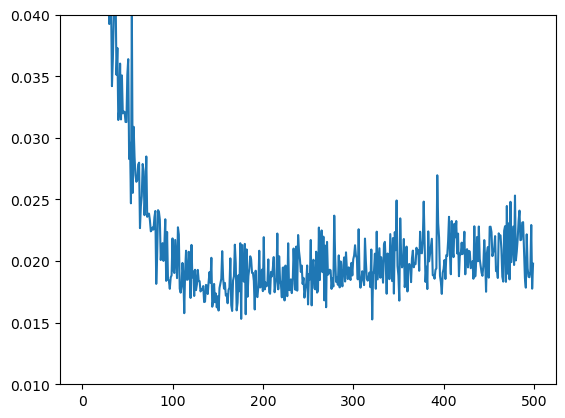

In [22]:
import matplotlib.pyplot as plt

plt.plot(cnn.history.history['val_loss'])
plt.ylim(0.01,0.04)

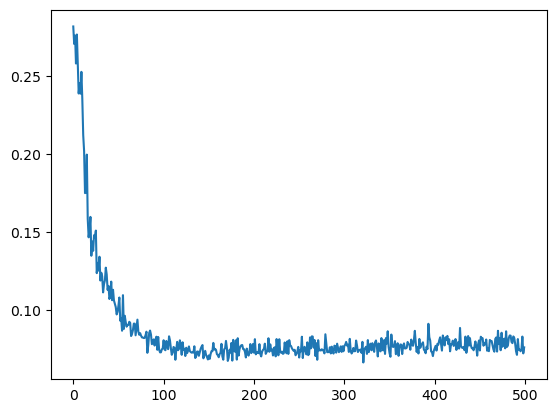

In [25]:
import matplotlib.pyplot as plt

plt.plot(cnn.history.history['val_mae'])

In [19]:
cnn.history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [8]:
filename = './datasets/pinem_amp10_seed42.npz'
test_filename = '/datasets/test_model_pinem_amp10_seed42.npz'
#logger_path = './logs/cnn_4layers_n4_inv_noisy_data.json'

# Load the dataset
_ = [1,2,3,4,5]
normalization = 'normalize'

dataset = d.DatasetPinem(*_,load = filename)

# xs : g rt fwhm omega offset

pipe = m.DataPreprocessor(dataset.noisy_spectres, dataset.xs[:,:-3],normalization=normalization, convolution=True)

#log = l.ModelInfo(logger_path)
log.add_iteration(filename,test_filename)
log.save_norm(normalization)

(X_train, y_train), (X_val, y_val), (X_test, y_test) = pipe.preprocess()

# Create the model

cnn2 = m.CNNModel(1024,2, mode = 'normal',filters=[64,32,16,8],kernel_size=[3,3,3,3],dropouts=[0.5,0.5,0.5,0.5])
cnn2.weights = cnn.weights

log.save_model(cnn2)

In [9]:
cnn2.train(X_train, y_train, X_val, y_val, epochs = 500, batch_size = 32)

Epoch 1/500
1434/1434 [==============================] - 7s 4ms/step - loss: 0.0490 - mse: 0.0490 - mae: 0.1527 - val_loss: 0.0435 - val_mse: 0.0435 - val_mae: 0.1508
Epoch 2/500
1434/1434 [==============================] - 6s 4ms/step - loss: 0.0432 - mse: 0.0432 - mae: 0.1438 - val_loss: 0.0412 - val_mse: 0.0412 - val_mae: 0.1440
Epoch 3/500
1434/1434 [==============================] - 6s 4ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1402 - val_loss: 0.0412 - val_mse: 0.0412 - val_mae: 0.1445
Epoch 4/500
1434/1434 [==============================] - 6s 4ms/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1381 - val_loss: 0.0395 - val_mse: 0.0395 - val_mae: 0.1420
Epoch 5/500
1434/1434 [==============================] - 6s 4ms/step - loss: 0.0388 - mse: 0.0388 - mae: 0.1368 - val_loss: 0.0377 - val_mse: 0.0377 - val_mae: 0.1401
Epoch 6/500
1434/1434 [==============================] - 6s 4ms/step - loss: 0.0378 - mse: 0.0378 - mae: 0.1349 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.137

In [10]:
tst = np.load('datasets/test_model_pinem_amp10_seed42.npz')
test_pipe = m.DataPreprocessor(1,2)
X_test = test_pipe.normalize_data(tst['data'])
res = cnn2.predict(X_test)

err = res - tst['truth']
mean_err = np.mean(err, axis = 0)
std_err = np.std(err, axis = 0)
err_dict= {'mean_g_err' : mean_err[0], 'std_g_err' : std_err[0], 'mean_rt_err' : mean_err[1], 'std_rt_err' : std_err[1]}

250/250 [==============================] - 0s 995us/step


In [11]:
log.save_test_results(err_dict)

In [12]:
log.save()